In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("fix_flags.bc.20180702-130224.csv")
data.rename(columns=lambda x:x.strip(), inplace=True) # Remove whitespace from column headers
data.loc[:, 'Energy'] *= 1e-6 # Convert energy to Joules
data.head()

,Benchmark,Flags,Energy,Time,Success
0,mg.D.x,-O0,40060.022202,206.631482,True
1,mg.D.x,-O0,40895.133224,208.966150,True
2,mg.D.x,-O0,40753.768046,207.854686,True
3,ft.B.x,-O0,1287.934996,6.727628,True
4,ft.B.x,-O0,1282.862683,6.711859,True


In [3]:
# Find all runs that failed
failed = data[data['Success'] == False]
failed.head()

,Benchmark,Flags,Energy,Time,Success
6,bt.C.x,-O0,0.544127,0.005636,False
7,bt.C.x,-O0,0.438231,0.004554,False
8,bt.C.x,-O0,0.455442,0.004455,False
9,lu.B.x,-O0,0.376342,0.003922,False
10,lu.B.x,-O0,0.280700,0.003131,False


In [4]:
no_o0 = data[data["Flags"] != "-O0"]

In [5]:
def plot_benchmark_results(benchmark, frame):
    data = frame[frame["Benchmark"] == benchmark]
    
    flags = ['O1', 'O2', 'O3']
    markers = ['x', 'o', 'v']
    
    fig, ax = plt.subplots()
    for i in range(len(flags)):
        flag = flags[i]
        marker = markers[i]
        
        flag_data = data[data["Flags"] == "-" + flag]
        
        x = flag_data["Time"].values
        y = flag_data["Energy"].values
        
        ax.scatter(x, y, marker=marker, label=flag)

    plt.legend()        
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.title('Energy vs Time for ' + benchmark + ' benchmark')


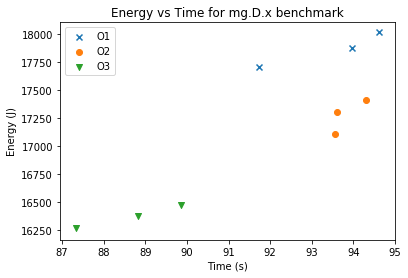

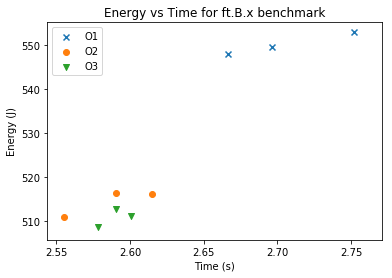

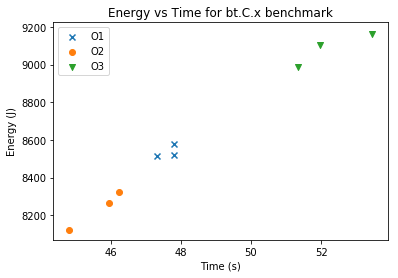

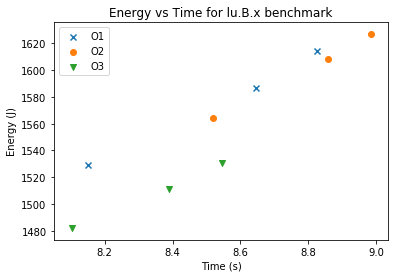

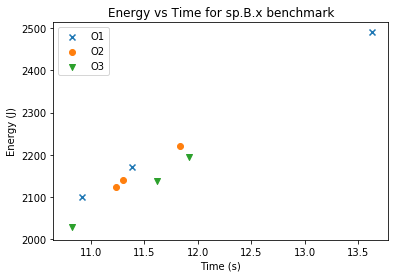

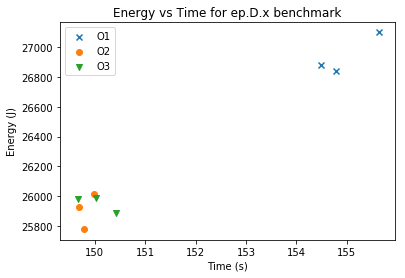

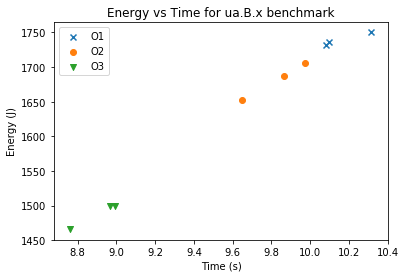

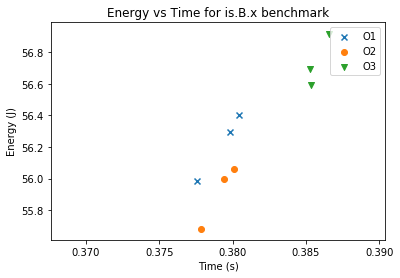

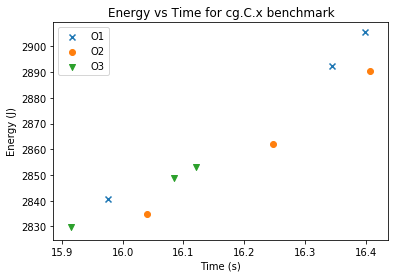

In [6]:
benchmarks = data["Benchmark"].unique()

for benchmark in benchmarks:
    plot_benchmark_results(benchmark, no_o0)